In [1]:
import pandas as pd
file=pd.read_csv("C:/Users/ASUS/data science calss/Social_Network_Ads (1).csv")
df=pd.DataFrame(file)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [2]:
df = pd.get_dummies(df)
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


In [3]:
y=df['Purchased']
x=df.drop(['Purchased'],axis=1).values

In [4]:
#splittingthe dataset into the traning set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
#Scalling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [6]:
#fitting K-NN to the  training set 

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski',p =2)


In [7]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
#predicting the test set results

y_pred = classifier.predict(x_test)

In [9]:
#to measure accuracy of model

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_test,y_pred)

0.95

In [10]:
confusion_matrix(y_test,y_pred)

array([[56,  2],
       [ 2, 20]], dtype=int64)

In [11]:
a=classification_report(y_test,y_pred)
print(a)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [12]:
# import roc_curve to compute reciver operating characteristics

from sklearn.metrics import roc_curve

In [13]:
#import  roc_auc_score to calculate the area under curve

from sklearn.metrics import roc_auc_score

In [14]:
#visualizing the ROC-AUC curve

y_proba = classifier.predict_proba(x_test)

#we take the predicted values of calss 1

y_predicted = y_proba[:,1]

In [15]:
print(y_predicted)

[0.2 0.  0.2 0.2 0.  0.  0.  1.  0.  0.8 0.  0.  0.2 0.4 0.  0.4 0.2 0.
 0.8 0.  0.  1.  0.2 0.6 0.  1.  0.  0.  0.  0.2 0.  0.4 0.8 0.  0.  0.
 0.  0.  0.  1.  0.  0.  0.  0.  0.6 0.  0.  1.  0.  0.8 0.8 0.  0.  1.
 0.8 1.  0.4 0.  0.6 0.  0.  0.8 0.  0.6 0.  0.8 0.2 0.  0.  0.2 1.  0.
 0.  1.  0.  0.  0.  0.2 0.8 0.4]


In [16]:
#using roc_curve() to generate fpr & tpr values

fpr , tpr , thresholds =roc_curve(y_test,y_predicted)

In [17]:
#passing the fpr & tpr values to auc() to calculate the area  under curve

from sklearn.metrics import auc

roc_auc = auc(fpr , tpr)

print(" area under the curve for first model:",roc_auc)

 area under the curve for first model: 0.9757053291536051


Text(0.5, 0, 'true positive rate (1-specificity')

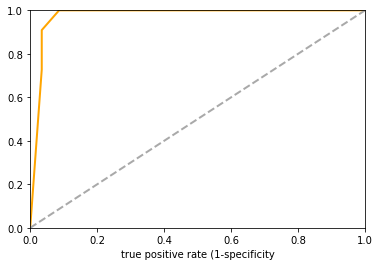

In [18]:
# plotting the roc curve

import matplotlib.pyplot as plt


plt.figure()

plt.plot(fpr ,tpr , color = 'orange', lw = 2,label = 'ROC curve(area under curve =%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],color = 'darkgrey',lw = 2, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("false positive rate (1-specificity")
plt.xlabel("true positive rate (1-specificity")